In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

%config IPCompleter.greedy=True
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

## UPLOAD DATASETS

In [20]:
path = '../../'

In [21]:
name_df = 'df_tablon.pickle'

In [22]:
df = pd.read_pickle(path + '/02_Data/03_Work/' + name_df)

   ## MODEL

### Create  a solutions space

remove variables that do not help segmentation

In [23]:
df.drop(columns=['fuente_Chat',
                'fuente_Direct Traffic',
                'fuente_Google',
                'fuente_OTHER',
                'fuente_Organic Search',
                'fuente_Reference',
                'score_actividad_mms',
                'score_perfil_mms',
                'ambito_Banking, Investment And Insurance',
                'ambito_Business Administration',
                'ambito_Finance Management',
                'ambito_Human Resource Management',
                'ambito_IT Projects Management',
                'ambito_International Business',
                'ambito_Marketing Management',
                'ambito_Media and Advertising',
                'ambito_OTHER',
                'ambito_Operations Management',
                'ambito_Select',
                'ambito_Supply Chain Management',
                'ambito_Travel and Tourism',
                'descarga_lm_No',
                'descarga_lm_Yes',
                'visitas_total_mms',
                'paginas_vistas_visita_mms'], inplace = True)

Segmentation shoosen after solutions analysis

In [24]:
min_k = 3
max_k = 7

solutions = list(range(min_k,max_k))

In [25]:


codo = []
silueta = []
calins = []
davies = []

### solution Space Analysis

In [26]:
for solution in solutions:
    
    #Fit
    cluster = KMeans(n_clusters = solution, n_init=10)
    cluster.fit(df)
    
    #Metrics
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

#### Metrics Analysis

In [27]:
metrics = pd.DataFrame({'Solution':solutions,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solution')

metrics

,Codo,Silueta,Calins,Davies
Solution,,,,
3,5338.17,0.29,1382.61,1.52
4,4793.06,0.30,1208.70,1.66
5,4275.46,0.32,1161.61,1.59
6,3862.05,0.36,1131.48,1.48


#### Plot Analysis

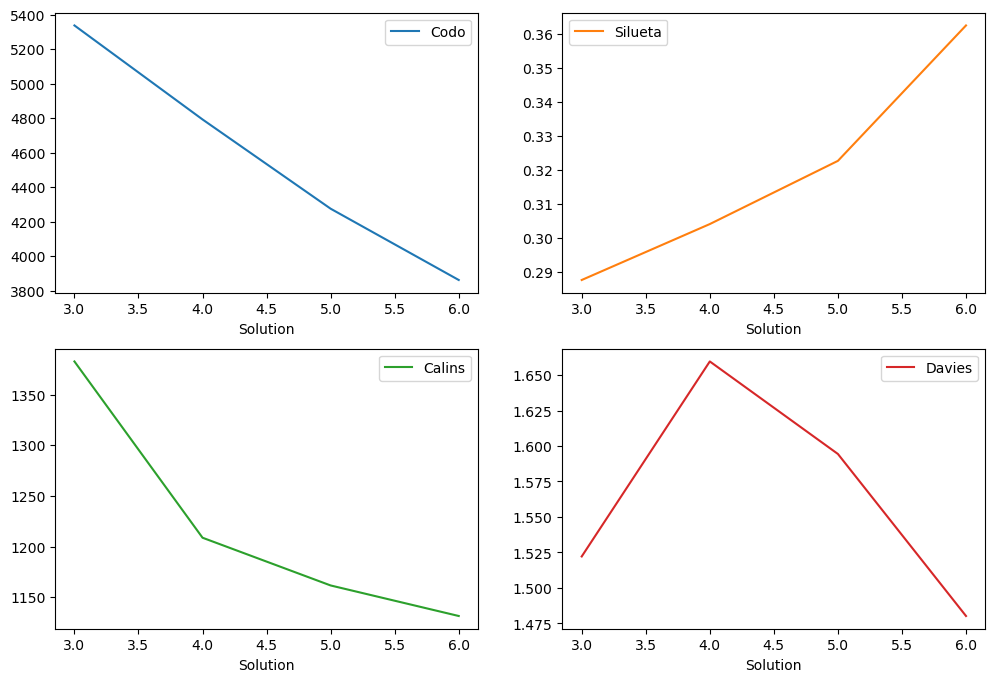

In [28]:
metrics.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

### Final Segmentation for the Best Solution

In [29]:
Best_solution = 6

#Fit
cluster = KMeans(n_clusters = Best_solution, n_init=10)
cluster.fit(df)

KMeans(n_clusters=6, n_init=10)

## EVALUATION

In [30]:
df['segment'] = cluster.predict(df)

## MAKE SEGMENTATION

In [31]:
df.groupby('segment').mean().T \
    .style.highlight_max(color = 'green', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segment,0,1,2,3,4,5
origen_API,0.000000,0.000000,1.000000,0.998811,0.219400,0.000000
origen_Landing Page Submission,0.948353,0.950265,0.000000,0.000000,0.568129,0.901130
origen_Lead Add Form,0.040419,0.040212,0.000000,0.001189,0.207852,0.081921
origen_OTHER,0.011228,0.009524,0.000000,0.000000,0.004619,0.016949
ult_actividad_Chat Conversation,0.000000,0.000000,0.000000,0.244946,0.013857,0.073446
ult_actividad_Converted to Lead,0.000000,0.000000,0.000000,0.120095,0.032333,0.240113
ult_actividad_Email Link Clicked,0.000000,0.000000,0.000000,0.061831,0.032333,0.122881
ult_actividad_Email Opened,1.000000,0.000000,1.000000,0.000000,0.387991,0.000000
ult_actividad_OTHER,0.000000,0.000000,0.000000,0.046373,0.073903,0.234463
ult_actividad_Page Visited on Website,0.000000,0.000000,0.000000,0.122473,0.046189,0.329096


In [32]:
df.segment.value_counts(normalize=True)

0   0.28
1   0.20
3   0.17
5   0.15
2   0.11
4   0.09
Name: segment, dtype: float64